**Exploratory Data Analaysis of AirBnB listings in one of the major locations of California - San Francisco**

**Overview of the data**

Data Source: http://insideairbnb.com/get-the-data.html

Data consists of the Airbnb listings from December 2022.Data consists of 16 columns which are:

id – represents the id of the listing (discrete)

name – It is the name of the listing (textual)

host_id – host id is a unique Id associated to each host in Airbnb (discrete)

host_name – the host’s name (textual)

neighbourhood_group – The city in which the listing is present (categorical)

neighbourhood – location of the listing (textual)

latitude – latitude value of the listing (continuous)

longitude – longitude value of the listing (continuous)

room_type – Category of the type of listing like entire house, private room etc. (categorical)

price – cost per night (continuous)

minimum_nights – minimum number of nights that the listing should be booked for (discrete)

number_of_reviews – total reviews received by the listing (discrete)

last_review – Date when the property received its last review (date)

reviews_per_month – the ratio of reviews received, and the time property is listed (continuous)

calculated_host_listings_count – the count of listings a host has on Airbnb (continuous)

availability_365 – the number of days a listing is available in a year (continuous)

number_of_reviews_ltm

license

Records count is 6,789

Reference for data source: http://www.columbia.edu/~sg3637/airbnb_final_analysis.html

**Objectives of the project:**

• Explore and clean the data for any missing values and duplicate data.

• Perform analysis on the price distribution in various major cities of California.

• Check if the price has a relation with the minimum stays as well as property type along with location.

• Perform geographical plotting of the price and location, and look for any interesting aspects near the San Francisco.

• Analyze the behavior of hosts with multiple listings.

• Understand the relation between reviews count, price and location.

• Create appropriate visualizations and build a summary of findings from the data.

***Motivation***

It asks and answers 3 questions :

1. What are the busiest months in San Francisco and the price variations of the same? This helps in understanding the options of housing and the prices for the same.
2. What are the type of rooms available? How does availability and price differ with type of room?
3. Which neighbourhood has most listings? How does availability and price vary with neighborhood? Is price related to number of listings in that neighbourhood? My blog post () on medium summarises the insights for a non-techinical audience.

***Files***

explore_analysis_summary_listingsreviewscalendarfiles.ipynb - it contains the code and graphs for the analysis

1. calendar.csv - it is a zipped file containing the day wise availability
2. reviews.csv - it is a summary version of reviews containing only the date, listing id and reviewer id.
3. listings.csv - it is a summary version of listings containing host id, listing id, neighborhood, availability etc.

In [340]:
from google.colab import drive
drive.mount('/content/drive/')

!pwd

import os
os.chdir('/content/drive/MyDrive/airbnb-data-analysis')

!pwd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/airbnb-data-analysis
/content/drive/MyDrive/airbnb-data-analysis


# Data Understanding

In [341]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import calendar
warnings.filterwarnings("ignore")

%matplotlib inline

In [342]:
#Ingest calendar,listing and review data
sf_calendar = pd.read_csv('calendar.csv',parse_dates=['date'])
sf_listings = pd.read_csv('listings.csv')
sf_reviews = pd.read_csv('reviews.csv',parse_dates=['date'])
sf_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,958,2022-12-04,f,$180.00,$180.00,2.0,1125.0
1,958,2022-12-05,f,$180.00,$180.00,2.0,1125.0
2,958,2022-12-06,f,$209.00,$209.00,2.0,1125.0
3,958,2022-12-07,f,$207.00,$207.00,2.0,1125.0
4,958,2022-12-08,f,$206.00,$206.00,2.0,1125.0


In [343]:
sf_reviews.head()

,listing_id,date
0,958,2009-07-23
1,958,2009-08-03
2,958,2009-09-27
3,958,2009-11-05
4,958,2010-02-13


In [344]:
pd.set_option('display.max_rows', sf_reviews.shape[0]+1)

In [345]:
sf_reviews.date.max()

Timestamp('2022-12-03 00:00:00')

In [346]:
sf_reviews.date.min()

Timestamp('2009-05-03 00:00:00')

In [347]:
sf_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,194,2,371,2022-11-18,2.28,1,161,57,City Registration Pending
1,487499,Mission District - Perfect Location,1682183,Daniel,NaN,Mission,37.75884,-122.42232,Entire home/apt,125,30,192,2022-10-31,1.51,1,356,5,NaN
2,144978,Prime Location - Small Basic Room,216682,Jay,NaN,Pacific Heights,37.79233,-122.42431,Private room,55,30,120,2020-03-31,0.86,9,54,0,NaN
3,490931,"Mission's ""La Lengua""",1269188,Maureen,NaN,Bernal Heights,37.74766,-122.42041,Private room,100,30,79,2015-08-01,0.75,1,358,0,NaN
4,147443,Best Views in all of San Francisco,709325,Mark,NaN,Diamond Heights,37.74633,-122.44591,Entire home/apt,167,30,112,2022-09-30,0.80,5,187,2,STR-0000672


In [348]:
sf_listings.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.789000e+03,6.789000e+03,0.0,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,5562.000000,6789.000000,6789.000000,6789.000000
mean,1.208976e+17,1.023542e+08,NaN,37.768296,-122.430186,268.709088,23.556930,48.659449,1.364036,13.667256,173.049345,10.637207
std,2.589342e+17,1.332468e+08,NaN,0.023061,0.027537,944.974389,53.748277,94.476154,1.991691,31.192535,133.141768,22.925957
min,9.580000e+02,1.169000e+03,NaN,37.708370,-122.512460,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.693015e+07,5.805679e+06,NaN,37.752970,-122.442880,99.000000,2.000000,1.000000,0.200000,1.000000,46.000000,0.000000
50%,3.564333e+07,3.601338e+07,NaN,37.772640,-122.423030,150.000000,6.000000,8.000000,0.580000,2.000000,164.000000,2.000000
75%,5.123414e+07,1.565042e+08,NaN,37.787430,-122.410390,250.000000,30.000000,49.000000,1.870000,9.000000,310.000000,10.000000
max,7.734981e+17,4.896232e+08,NaN,37.809540,-122.358480,25000.000000,1125.000000,977.000000,36.490000,153.000000,365.000000,558.000000


In [349]:
sf_listings[sf_listings["price"]==0]["price"].count()

3

In [350]:
sf_listings = sf_listings[sf_listings.price > 0]

In [351]:
sf_listings.shape

(6786, 18)

In [352]:
sf_listings.reviews_per_month.describe()

count    5560.000000
mean        1.364401
std         1.991955
min         0.010000
25%         0.200000
50%         0.580000
75%         1.870000
max        36.490000
Name: reviews_per_month, dtype: float64

In [353]:
sf_listings.number_of_reviews.describe()

count    6786.000000
mean       48.679192
std        94.492338
min         0.000000
25%         1.000000
50%         8.000000
75%        49.000000
max       977.000000
Name: number_of_reviews, dtype: float64

In [354]:
sf_listings = sf_listings[sf_listings.reviews_per_month > 0]
sf_listings.shape

(5560, 18)

In [355]:
#dropping the outlier whose minimum nights is greater than 365
sf_listings = sf_listings[sf_listings["minimum_nights"]<=365]

In [356]:
sf_listings.shape

(5554, 18)

<Axes: ylabel='Frequency'>

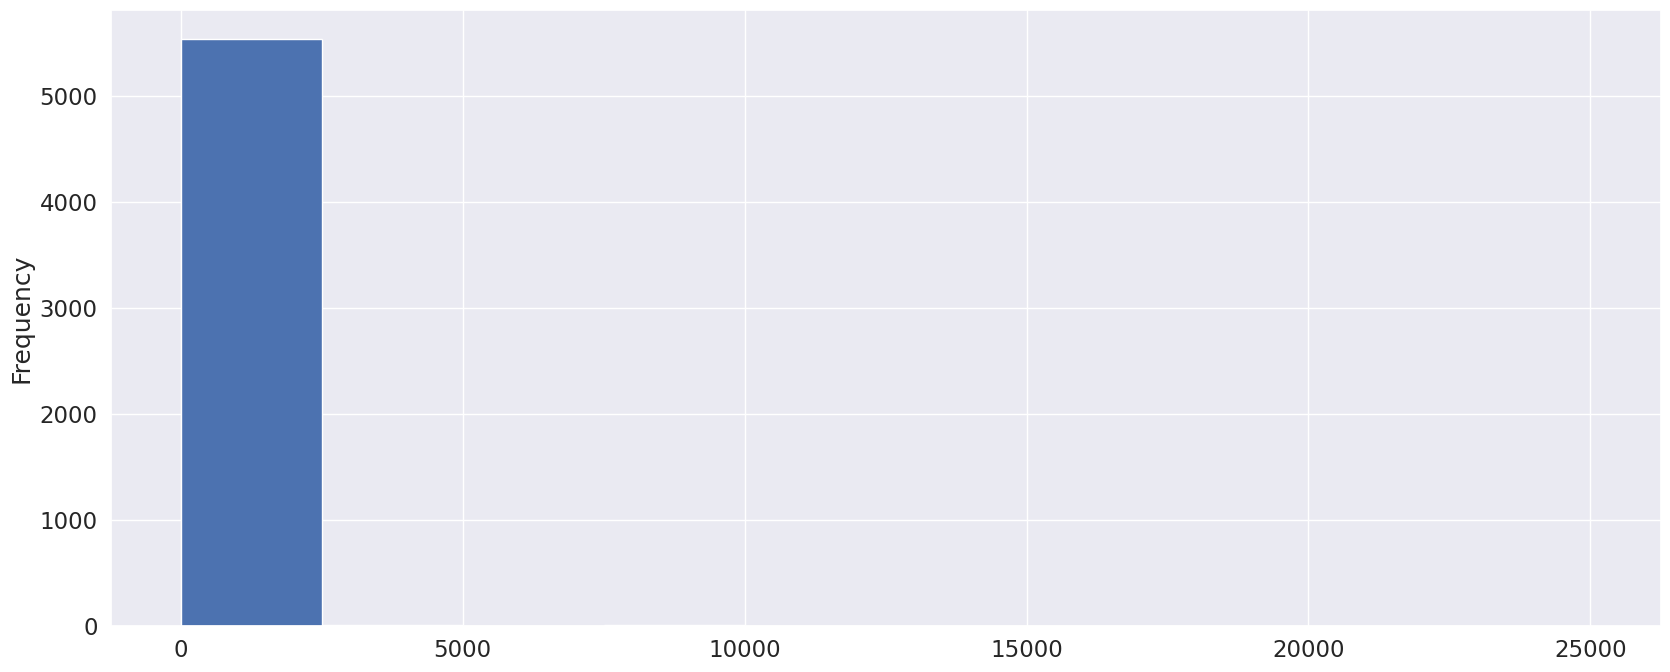

In [357]:
sf_listings["price"].plot(kind="hist")

In [358]:
np.percentile(sf_listings["price"],95)

550.0

In [359]:
sf_listings['price'].max()

25000

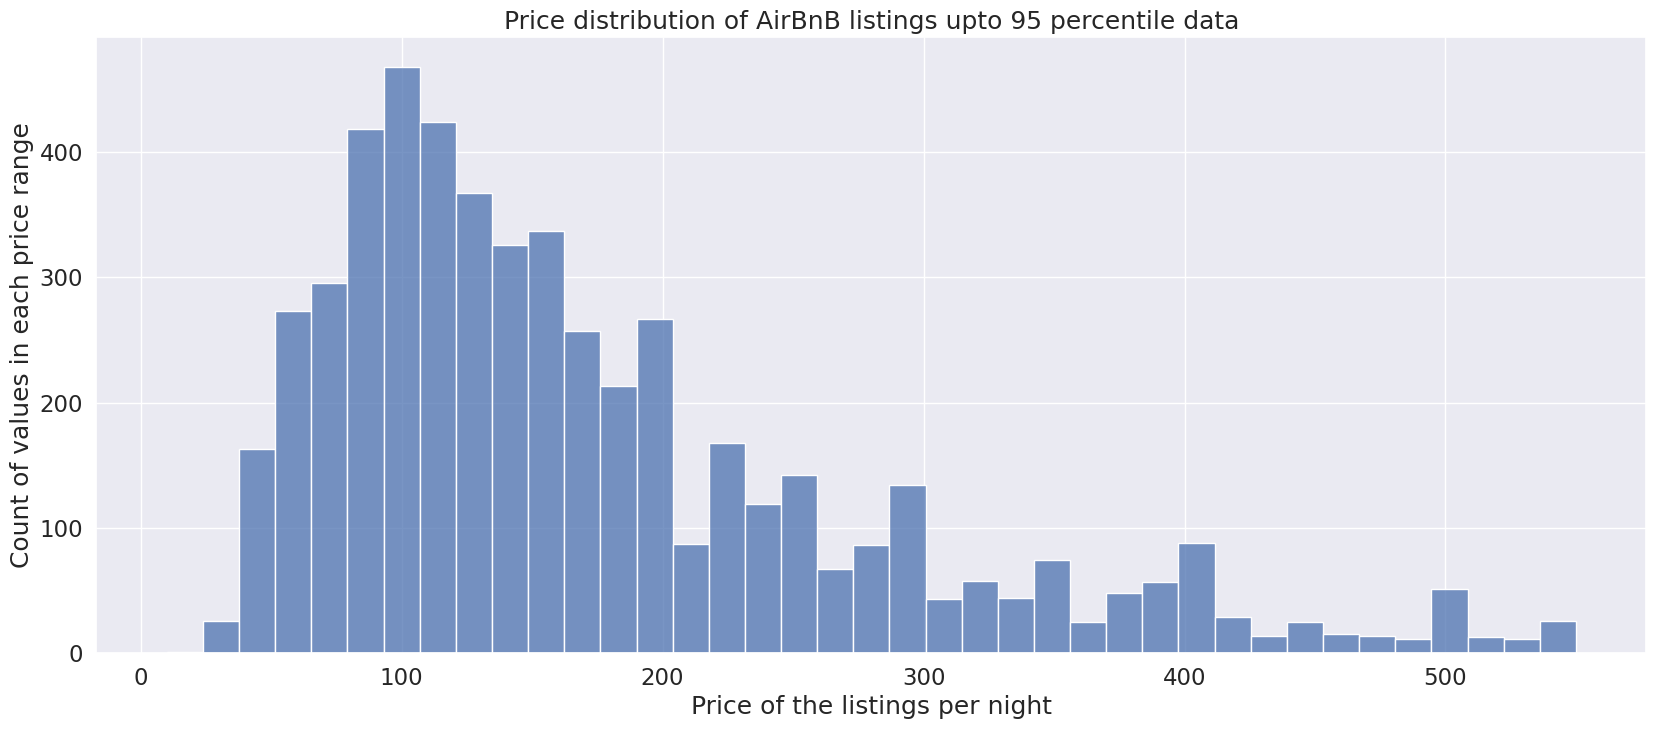

In [360]:
#Considering the 95 percentile data of price
sns.set(rc={'figure.figsize':(20,8)})
sns.set(font_scale=1.5)
sns.histplot(sf_listings[sf_listings["price"]<=550]["price"],kde=False)
plt.title("Price distribution of AirBnB listings upto 95 percentile data")
plt.xlabel("Price of the listings per night")
plt.ylabel("Count of values in each price range")
plt.show()

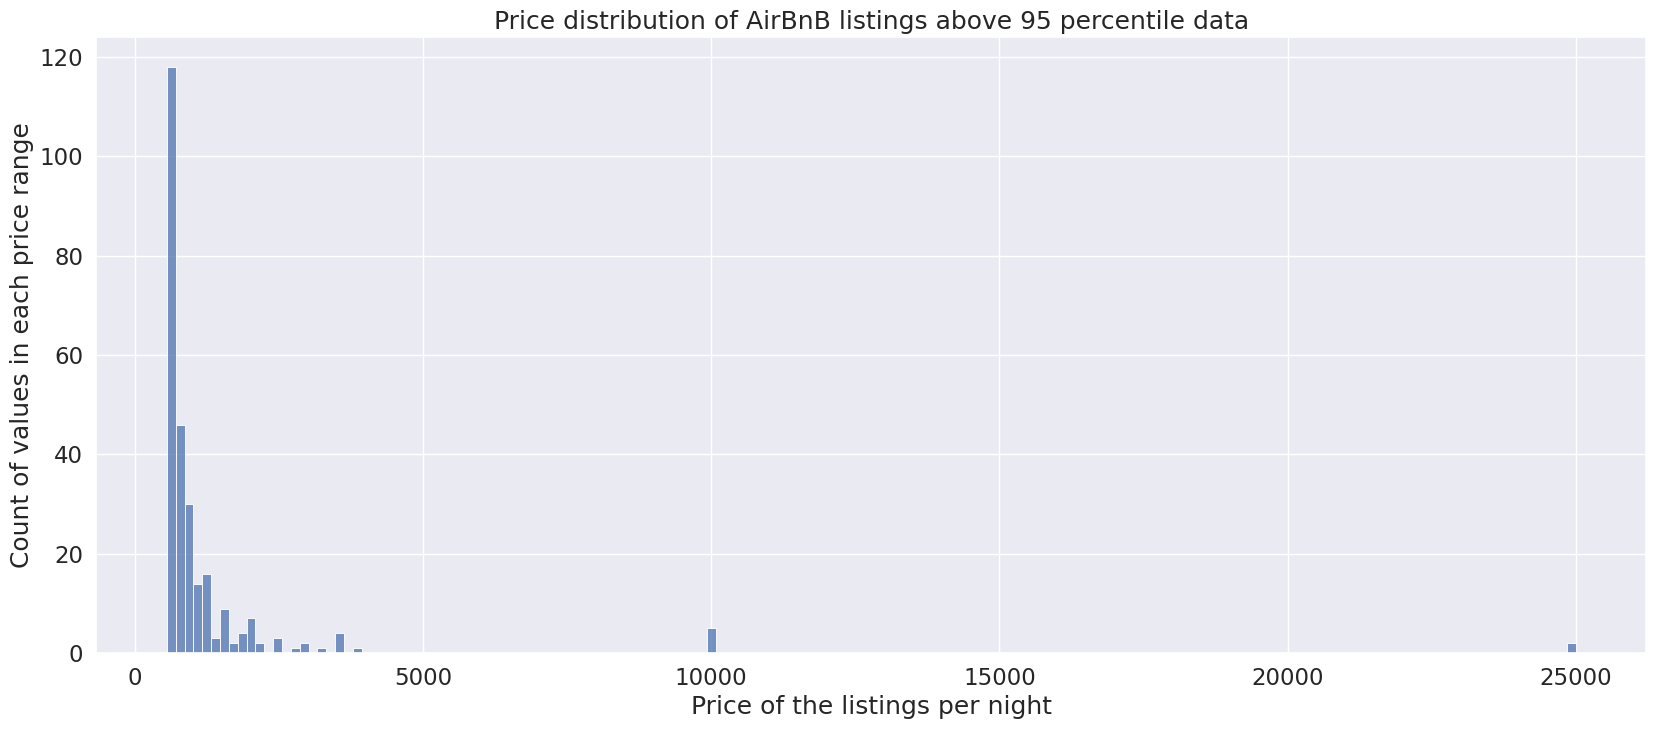

In [361]:
sns.histplot(sf_listings[sf_listings["price"]>550]["price"],kde=False)
plt.title("Price distribution of AirBnB listings above 95 percentile data")
plt.xlabel("Price of the listings per night")
plt.ylabel("Count of values in each price range")
plt.show()

In [362]:
sf_listing_data_95 = sf_listings[sf_listings["price"]<=np.percentile(sf_listings["price"],95)]

In [363]:
sf_listing_data_95.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,5.284000e+03,5.284000e+03,0.0,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000
mean,8.420145e+16,9.265703e+07,NaN,37.766123,-122.431783,173.363929,18.963853,61.157078,1.398880,12.052422,170.174111,13.327593
std,2.183342e+17,1.265045e+08,NaN,0.023276,0.028161,106.425717,39.178538,103.103821,2.027583,27.947513,129.401758,25.226687
min,9.580000e+02,1.169000e+03,NaN,37.708370,-122.511360,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,1.397853e+07,5.042117e+06,NaN,37.750200,-122.444900,98.000000,2.000000,4.000000,0.210000,1.000000,49.000000,1.000000
50%,3.112447e+07,2.781674e+07,NaN,37.769395,-122.424195,143.000000,4.000000,16.000000,0.600000,2.000000,161.000000,3.000000
75%,4.903898e+07,1.312004e+08,NaN,37.786340,-122.410857,220.000000,30.000000,69.000000,1.930000,7.000000,301.000000,16.000000
max,7.669620e+17,4.873070e+08,NaN,37.809540,-122.358480,550.000000,365.000000,977.000000,36.490000,153.000000,365.000000,558.000000


In [364]:
sf_listing_data_95.shape

(5284, 18)

In [365]:
#change true and false as 1 and 0 respectively for considering only available==1 entries
replace_map = {'available':{'f': 0,'t' : 1}}
sf_calendar.replace(replace_map, inplace=True)
sf_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,958,2022-12-04,0,$180.00,$180.00,2.0,1125.0
1,958,2022-12-05,0,$180.00,$180.00,2.0,1125.0
2,958,2022-12-06,0,$209.00,$209.00,2.0,1125.0
3,958,2022-12-07,0,$207.00,$207.00,2.0,1125.0
4,958,2022-12-08,0,$206.00,$206.00,2.0,1125.0


In [366]:
sf_listing_data_95.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,194,2,371,2022-11-18,2.28,1,161,57,City Registration Pending
1,487499,Mission District - Perfect Location,1682183,Daniel,NaN,Mission,37.75884,-122.42232,Entire home/apt,125,30,192,2022-10-31,1.51,1,356,5,NaN
2,144978,Prime Location - Small Basic Room,216682,Jay,NaN,Pacific Heights,37.79233,-122.42431,Private room,55,30,120,2020-03-31,0.86,9,54,0,NaN
3,490931,"Mission's ""La Lengua""",1269188,Maureen,NaN,Bernal Heights,37.74766,-122.42041,Private room,100,30,79,2015-08-01,0.75,1,358,0,NaN
4,147443,Best Views in all of San Francisco,709325,Mark,NaN,Diamond Heights,37.74633,-122.44591,Entire home/apt,167,30,112,2022-09-30,0.80,5,187,2,STR-0000672


In [367]:
sf_reviews.head()

,listing_id,date
0,958,2009-07-23
1,958,2009-08-03
2,958,2009-09-27
3,958,2009-11-05
4,958,2010-02-13


In [368]:
print(sf_calendar.describe())
print(sf_listing_data_95.info())

         listing_id     available  minimum_nights  maximum_nights
count  2.477255e+06  2.477255e+06    2.477254e+06    2.477254e+06
mean   1.209332e+17  4.744497e-01    3.042452e+01    8.934026e+06
std    2.589450e+17  4.993469e-01    7.192692e+01    1.382176e+08
min    9.580000e+02  0.000000e+00    1.000000e+00    1.000000e+00
25%    1.691329e+07  0.000000e+00    2.000000e+00    9.000000e+01
50%    3.564288e+07  0.000000e+00    7.000000e+00    1.125000e+03
75%    5.124623e+07  1.000000e+00    3.000000e+01    1.125000e+03
max    7.734981e+17  1.000000e+00    1.125000e+03    2.147484e+09
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5284 entries, 0 to 6785
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5284 non-null   int64  
 1   name                            5284 non-null   object 
 2   host_id                         5284 non-null   in

***Data Preparation***

***In this section, we drop 2 columns a) 'neighbourhood_group' from sf_listings as it has only NaN values b) 'adjusted_price' from sf_calendar as it has the same values as 'price'***

In [369]:
# remove redundant columns like neigbourhood_group from listings and adjusted_price from calendar
sf_listing_data_95 = sf_listing_data_95.drop(columns = ['neighbourhood_group'])
sf_calendar = sf_calendar.drop(['adjusted_price'],axis=1)

#check the sizes of the dataset
print('Listings :{}'.format(sf_listing_data_95.shape))
print('Reviews :{}'.format(sf_reviews.shape))
print('Calendar :{}'.format(sf_calendar.shape))

Listings :(5284, 17)
Reviews :(330349, 2)
Calendar :(2477255, 6)


***1. What months are busiest in San Francisco? What are the price variations?***

***Busiest Months in San Francisco***

In [370]:
# make new dataframe for number of reviews
rev_freq = pd.DataFrame(sf_reviews['date'].value_counts().values,
                        index=sf_reviews['date'].value_counts().index,
                        columns=['Number of reviews'])

# resample data grouping by year
rev_freq_year = rev_freq.resample('A').sum()
# Print values
rev_freq_year

,Number of reviews
2009-12-31,35
2010-12-31,297
2011-12-31,1042
2012-12-31,2219
2013-12-31,4908
2014-12-31,10640
2015-12-31,16338
2016-12-31,25678
2017-12-31,35069
2018-12-31,44888


In [371]:
#Finding out the earliest and latest review date
sf_reviews['StartDate'] = pd.to_datetime(sf_reviews['date'])
least_recent_date = sf_reviews['StartDate'].min()
recent_date = sf_reviews['StartDate'].max()
print(least_recent_date)
print(recent_date)

2009-05-03 00:00:00
2022-12-03 00:00:00


In [372]:
# Select the year 2021
rev_freq_2021 = rev_freq.loc['2021']
# The review sum per month
rev_2021_month = rev_freq_2021.resample('M').sum()
rev_2021_month['% rev'] = (rev_2021_month['Number of reviews']*100)/rev_2021_month['Number of reviews'].sum()
# Print values
rev_2021_month

,Number of reviews,% rev
2021-01-31,953,2.282525
2021-02-28,1279,3.063326
2021-03-31,2050,4.909944
2021-04-30,2552,6.112282
2021-05-31,3223,7.719391
2021-06-30,3846,9.211535
2021-07-31,4749,11.374305
2021-08-31,5164,12.368270
2021-09-30,4588,10.988695
2021-10-31,4574,10.955164


In [373]:
def bar_plot(X,Y,x_label,y_label,title) :
    """
    Description: This function can be used to plot bar plots.

    Arguments:
    X = values to be plotted on x-axis
    Y = values to be plotted on y-axis
    x_label = Label to be placed near x-axis
    y_label = Label to be placed near y-axis
    title = title of plot

    Returns:
    None
    """ 
# Bar plot
    fig1 = plt.figure(figsize=(10, 5))
    ax = fig1.add_subplot(1, 1, 1, aspect='auto')
    sns.barplot(x=X, y=Y)

# Set axis label properties
    ax.set_xlabel(x_label, weight='normal', size=20)
    ax.set_ylabel(y_label, weight='normal', size=20)
    plt.title(title, fontsize=20)

# Set tick label properties
    ax.tick_params('x', labelsize=15, rotation=35)
    ax.tick_params('y', labelsize=15)
    plt.show()

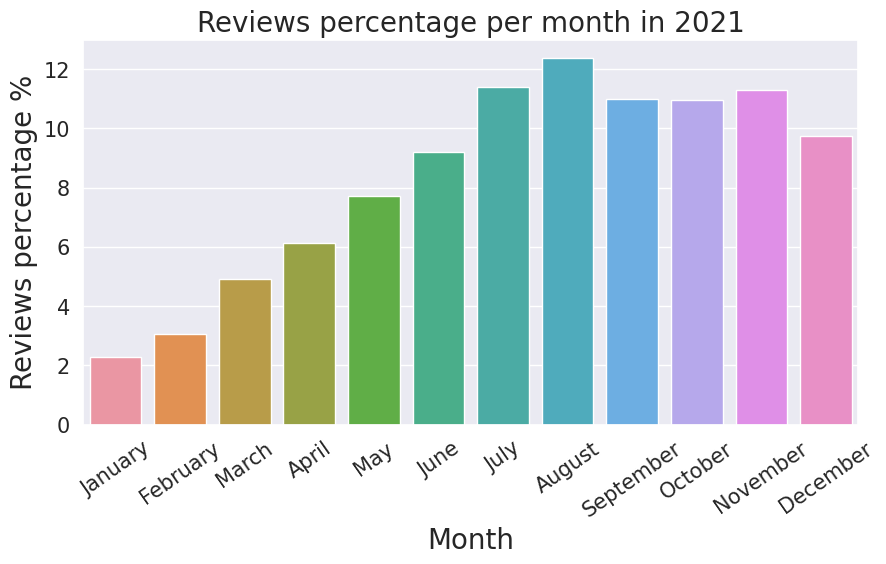

In [374]:
bar_plot(rev_2021_month.index.month_name(),rev_2021_month['% rev'],'Month','Reviews percentage %',
         'Reviews percentage per month in 2021')

In [375]:
# Select the year 2022
rev_freq_2022 = rev_freq.loc['2022']
# The review sum per month
rev_2022_month = rev_freq_2022.resample('M').sum()
rev_2022_month['% rev'] = (rev_2022_month['Number of reviews']*100)/rev_2022_month['Number of reviews'].sum()
# Print values
rev_2022_month

,Number of reviews,% rev
2022-01-31,3832,5.602175
2022-02-28,4169,6.094851
2022-03-31,5435,7.945674
2022-04-30,5940,8.683957
2022-05-31,7132,10.426596
2022-06-30,6962,10.178065
2022-07-31,7122,10.411976
2022-08-31,7796,11.397328
2022-09-30,7699,11.255519
2022-10-31,7207,10.536242


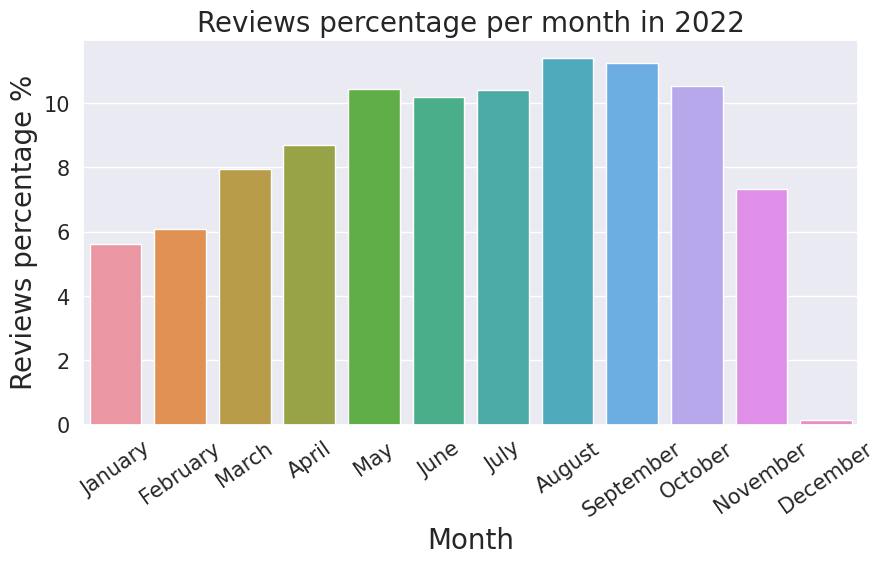

In [376]:
bar_plot(rev_2022_month.index.month_name(),rev_2022_month['% rev'],'Month','Reviews percentage %',
         'Reviews percentage per month in 2022')

***Result : August, September and October are the busiest months.***

***Price Variations***

In [377]:
#Remove all rows which have 0 for availibility as they cannot influence price
sf_calendar_copy = sf_calendar.copy()
sf_calendar_copy = sf_calendar_copy[sf_calendar_copy['available']==1]

In [378]:
# Number of price listings per year
freq_cal = pd.DataFrame(sf_calendar_copy['date'].value_counts().values,
                        index=sf_calendar_copy['date'].value_counts().index,
                        columns=['Frequency of Price'])
freq_year_cal = freq_cal.resample('A').sum()
# Print values
freq_year_cal

,Frequency of Price
2022-12-31,81537
2023-12-31,1093796


In [379]:
#start and end date of entries in calendar.csv
sf_calendar_copy['StartDate'] = pd.to_datetime(sf_calendar_copy['date'])
least_recent_date = sf_calendar_copy['StartDate'].min()
recent_date = sf_calendar_copy['StartDate'].max()
print(least_recent_date)
print(recent_date)

2022-12-04 00:00:00
2023-12-03 00:00:00


In [380]:
# Index data by date
sf_calendar_copy.index = sf_calendar_copy['date']

# Get data for 2023
sf_calendar_2023 = sf_calendar_copy.loc['2023']

# Percentage of missing values
sf_calendar_2023.isnull().mean()

listing_id        0.000000e+00
date              0.000000e+00
available         0.000000e+00
price             6.610008e-04
minimum_nights    9.142473e-07
maximum_nights    9.142473e-07
StartDate         0.000000e+00
dtype: float64

In [381]:
sf_calendar_2023.isnull().sum()

listing_id          0
date                0
available           0
price             723
minimum_nights      1
maximum_nights      1
StartDate           0
dtype: int64

In [382]:
6.610008e-04

0.0006610008

In [383]:
# Drop rows with missing price values as there are 723 missing values
sf_calendar_2023_c = sf_calendar_2023.dropna()

# Preprocess the price variable
sf_calendar_2023_c['price'] = sf_calendar_2023_c['price'].apply(
    lambda x: float(x[1:].replace(',', '')))

In [384]:
# The price
print("Price min : ",  sf_calendar_2023_c['price'].min())
print("Price max : ",  sf_calendar_2023_c['price'].max())
print("Price mean : ", sf_calendar_2023_c['price'].mean())

Price min :  27.0
Price max :  94106.0
Price mean :  375.09954513517863


In [385]:
sf_calendar_2023_c.describe()

,listing_id,available,price,minimum_nights,maximum_nights
count,1.093072e+06,1093072.0,1.093072e+06,1.093072e+06,1.093072e+06
mean,1.406790e+17,1.0,3.750995e+02,3.814896e+01,7.961688e+06
std,2.757909e+17,0.0,1.313879e+03,8.226594e+01,1.305070e+08
min,9.580000e+02,1.0,2.700000e+01,1.000000e+00,1.000000e+00
25%,1.719272e+07,1.0,1.050000e+02,2.000000e+00,1.820000e+02
50%,3.774537e+07,1.0,1.620000e+02,3.000000e+01,1.125000e+03
75%,5.256924e+07,1.0,2.750000e+02,3.000000e+01,1.125000e+03
max,7.734981e+17,1.0,9.410600e+04,1.125000e+03,2.147484e+09


In [386]:
9.410600e+04

94106.0

In [387]:
1.125000e+03

1125.0

In [388]:
2.147484e+09

2147484000.0

In [389]:
sf_calendar_2023_c = sf_calendar_2023_c[sf_calendar_2023_c.price > 0]
sf_calendar_2023_c.shape

(1093072, 7)

In [390]:
sf_calendar_2023_c = sf_calendar_2023_c[sf_calendar_2023_c.minimum_nights <= 365]
sf_calendar_2023_c.shape

(1091725, 7)

In [391]:
sf_calendar_2023_c = sf_calendar_2023_c[sf_calendar_2023_c.maximum_nights <= 365]
sf_calendar_2023_c.shape

(460740, 7)

<Axes: ylabel='Frequency'>

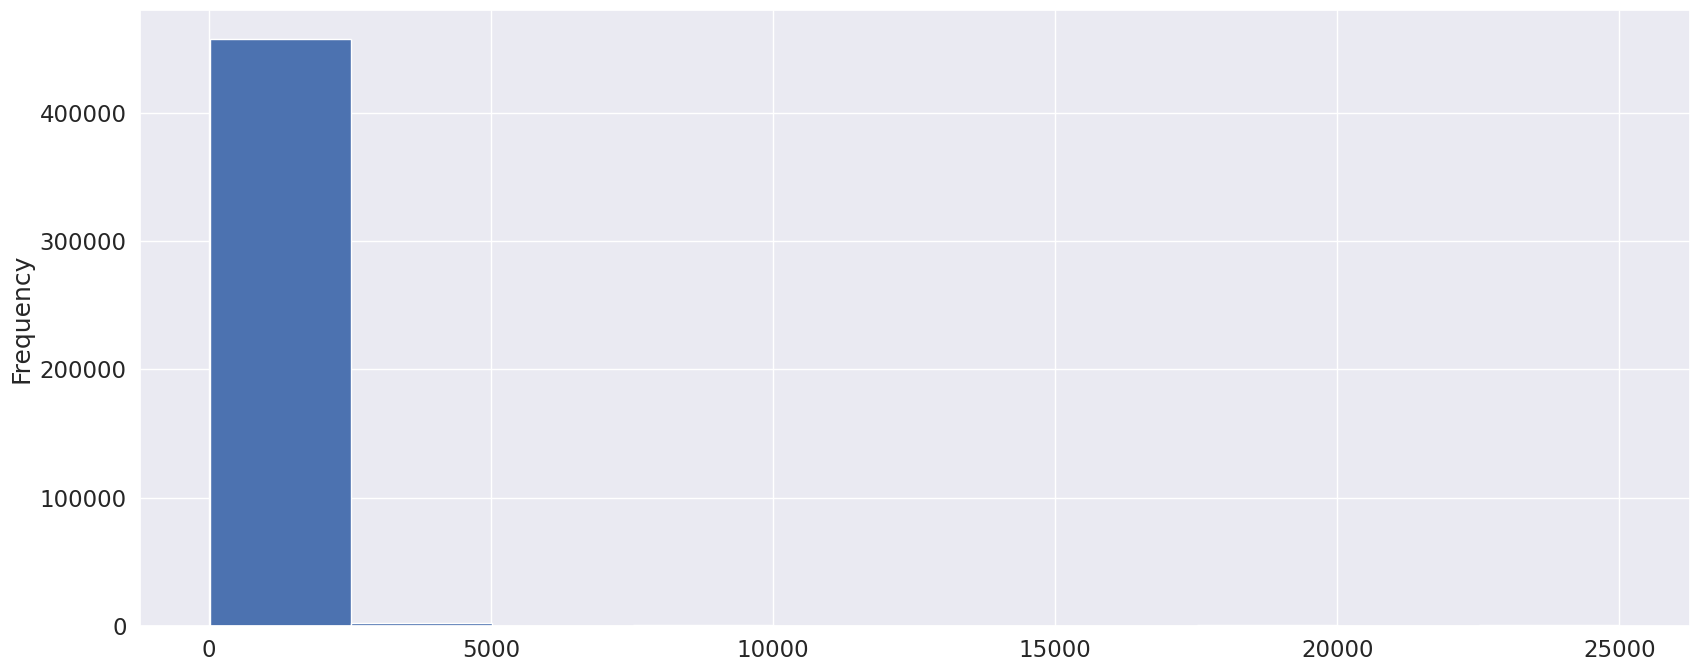

In [392]:
sf_calendar_2023_c["price"].plot(kind="hist")

In [393]:
np.percentile(sf_calendar_2023_c["price"],95)

659.0

In [394]:
sf_calendar_2023_c['price'].max()

25000.0

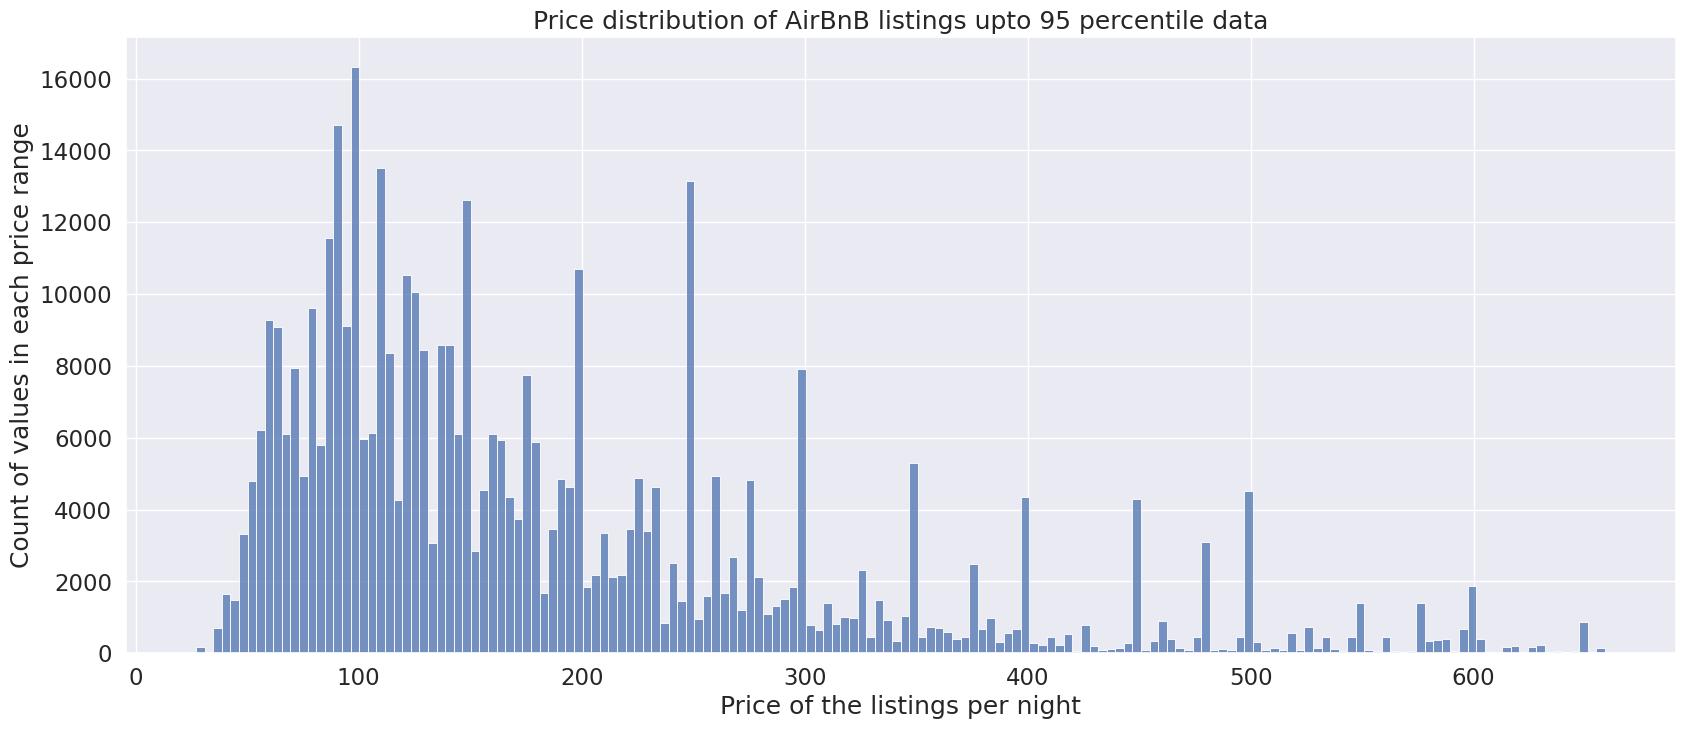

In [395]:
#Considering the 95 percentile data of price
sns.set(rc={'figure.figsize':(20,8)})
sns.set(font_scale=1.5)
sns.histplot(sf_calendar_2023_c[sf_calendar_2023_c["price"]<=659]["price"],kde=False)
plt.title("Price distribution of AirBnB listings upto 95 percentile data")
plt.xlabel("Price of the listings per night")
plt.ylabel("Count of values in each price range")
plt.show()

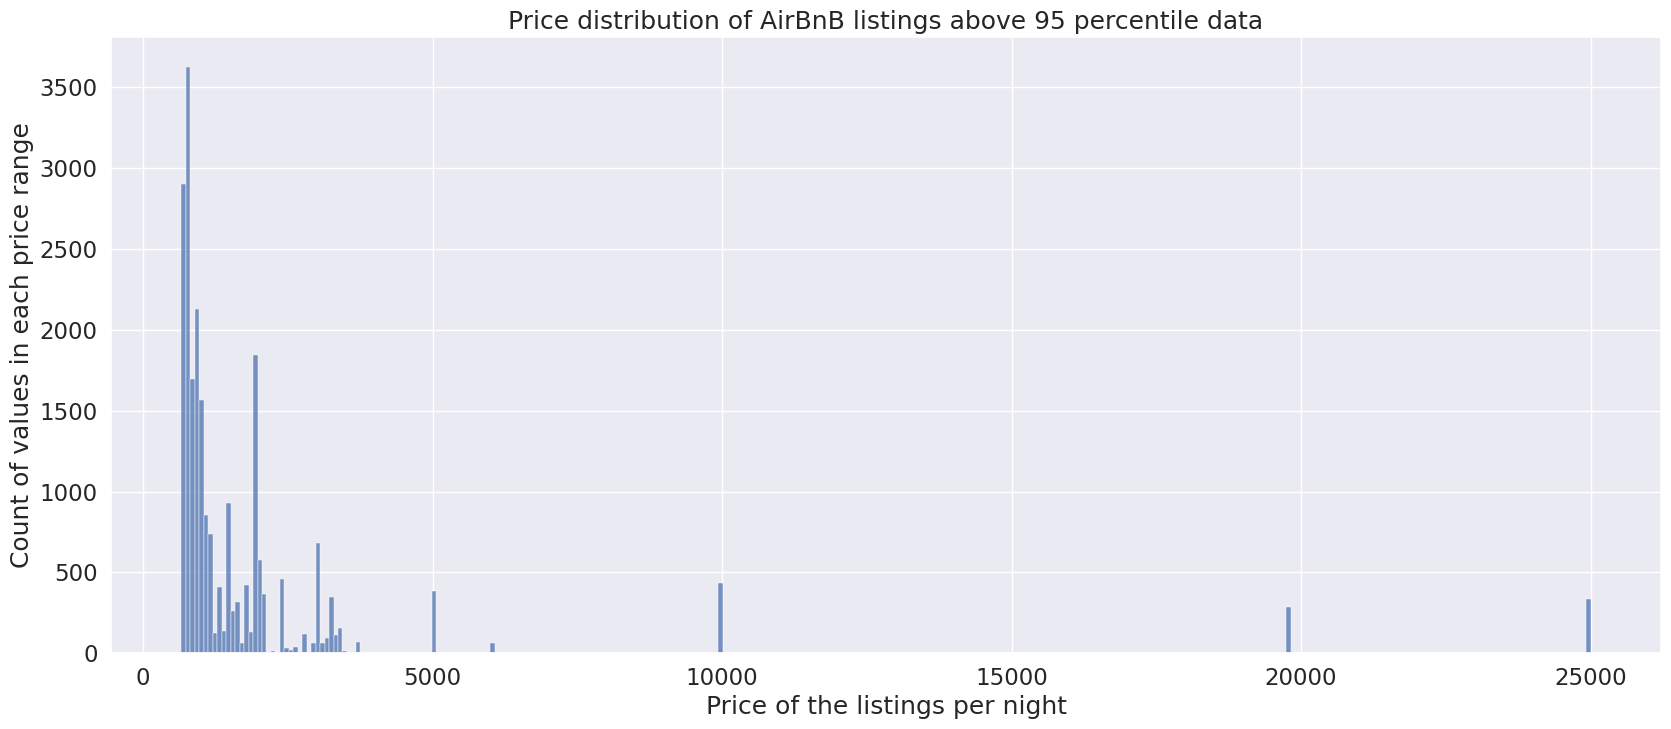

In [396]:
sns.histplot(sf_calendar_2023_c[sf_calendar_2023_c["price"]>659]["price"],kde=False)
plt.title("Price distribution of AirBnB listings above 95 percentile data")
plt.xlabel("Price of the listings per night")
plt.ylabel("Count of values in each price range")
plt.show()

In [397]:
sf_calendar_2023_c_data_95 = sf_calendar_2023_c[sf_calendar_2023_c["price"]<=np.percentile(sf_calendar_2023_c["price"],95)]

In [398]:
sf_calendar_2023_c_data_95.describe()

,listing_id,available,price,minimum_nights,maximum_nights
count,4.377830e+05,437783.0,437783.000000,437783.000000,437783.000000
mean,2.088118e+17,1.0,186.576244,21.951725,179.587177
std,3.138822e+17,0.0,123.502079,37.708873,147.714151
min,5.858000e+03,1.0,27.000000,1.000000,1.000000
25%,1.849224e+07,1.0,98.000000,2.000000,29.000000
50%,4.194167e+07,1.0,149.000000,30.000000,150.000000
75%,6.094467e+17,1.0,245.000000,30.000000,365.000000
max,7.734981e+17,1.0,659.000000,365.000000,365.000000


In [399]:
sf_calendar_2023_c_data_95 = sf_calendar_2023_c_data_95[['price','available']]

# Print the first five rows
sf_calendar_2023_c_data_95.head()

,price,available
date,,
2023-01-07,55.0,1
2023-01-12,55.0,1
2023-01-14,55.0,1
2023-01-18,55.0,1
2023-01-20,55.0,1


In [400]:
# Resemple data by month
df_2023_month = sf_calendar_2023_c_data_95.resample('M').mean()
# difference between the price mean per month and the price mean
df_2023_month['diff mean'] = df_2023_month['price'] \
    - sf_calendar_2023_c_data_95['price'].mean()

# Print data
df_2023_month

,price,available,diff mean
date,,,
2023-01-31,179.817039,1.0,-6.759205
2023-02-28,179.369824,1.0,-7.206421
2023-03-31,177.484135,1.0,-9.092109
2023-04-30,181.412359,1.0,-5.163886
2023-05-31,185.448303,1.0,-1.127941
2023-06-30,193.114144,1.0,6.537900
2023-07-31,195.478514,1.0,8.902270
2023-08-31,193.614537,1.0,7.038293
2023-09-30,195.181923,1.0,8.605678


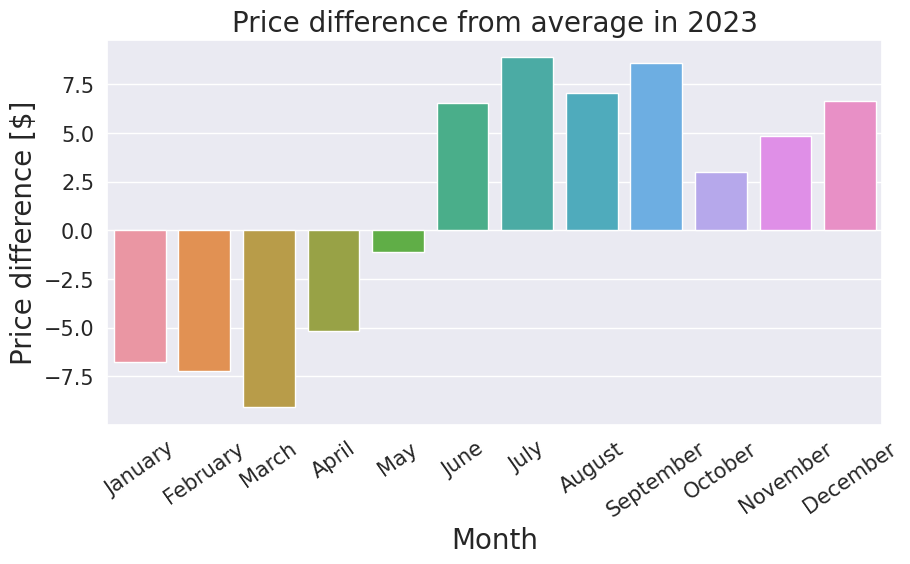

In [401]:
bar_plot(df_2023_month.index.month_name(),df_2023_month['diff mean'],'Month','Price difference [$]',
         'Price difference from average in 2023')

***Result : July, August and September are the most expensive months. January,February and March are least expensive.***

***2. What types of rooms are available? What is the price difference according to room type?***

In [402]:
#availability per room type
sf_listing_data_95.room_type.value_counts()
sf_houses = sf_listing_data_95.groupby(['room_type']).mean()['availability_365'].sort_values()
print(sf_houses)

room_type
Shared room        156.692308
Entire home/apt    164.703148
Private room       177.832881
Hotel room         259.648148
Name: availability_365, dtype: float64


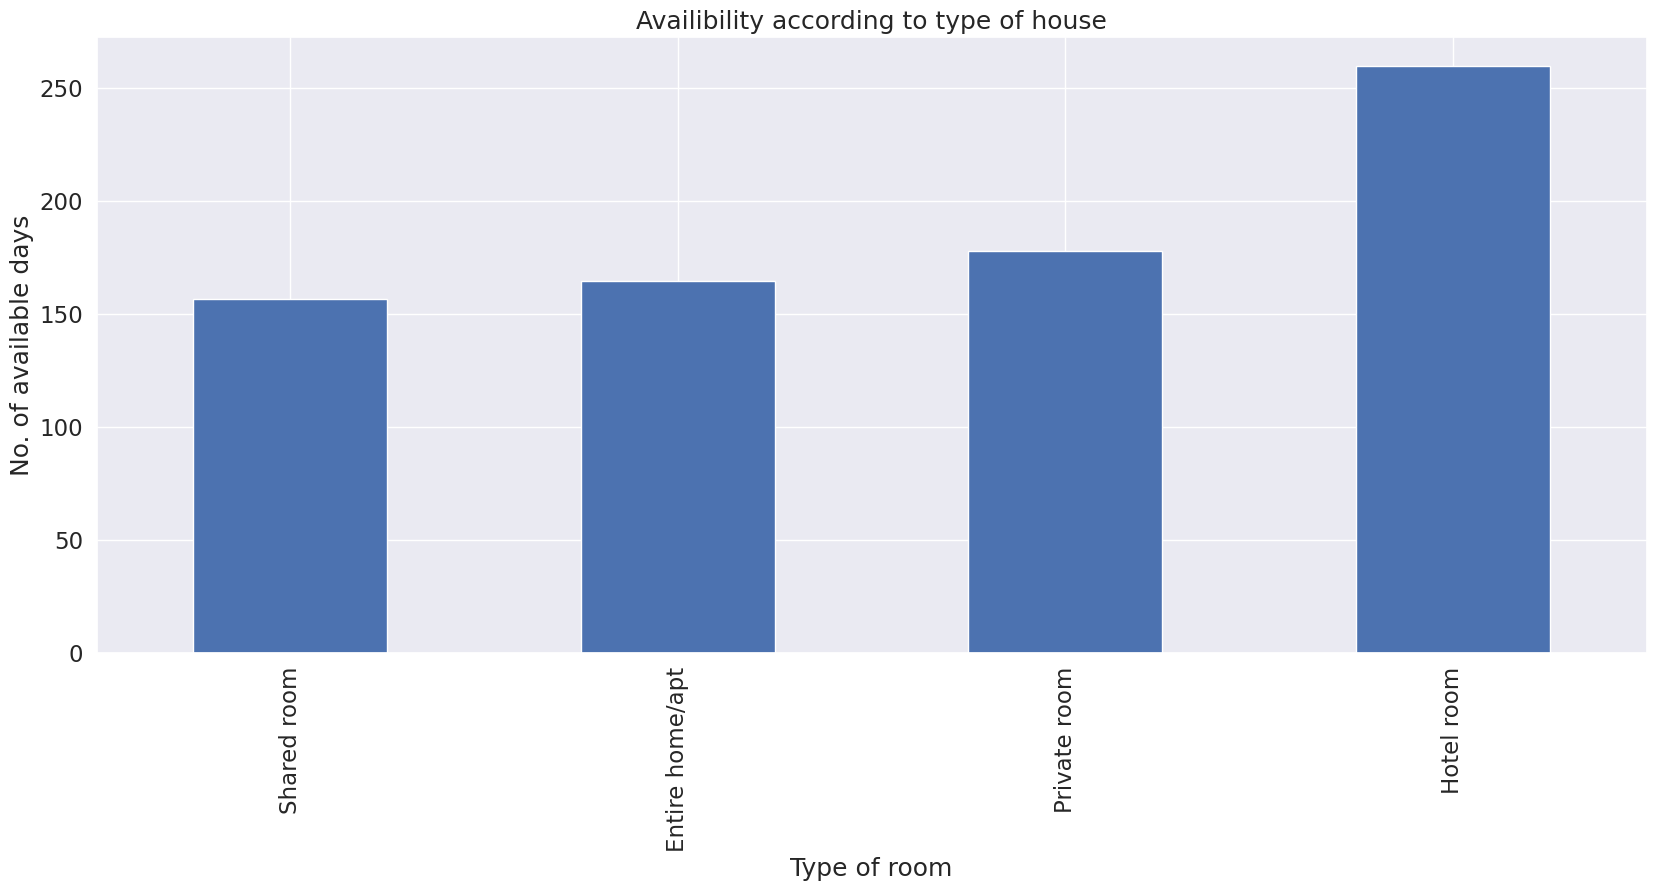

In [403]:
#plot availability vs room_type
sf_houses.plot(kind="bar");
plt.xlabel("Type of room")
plt.ylabel("No. of available days")
plt.title("Availibility according to type of house");

In [404]:
#checking if room_type has missing values
sf_listing_data_95.isnull().mean()

id                                0.000000
name                              0.000000
host_id                           0.000000
host_name                         0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.000000
reviews_per_month                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
license                           0.339326
dtype: float64

room_type
Shared room         88.576923
Private room       124.768313
Entire home/apt    201.035982
Hotel room         204.555556
Name: price, dtype: float64


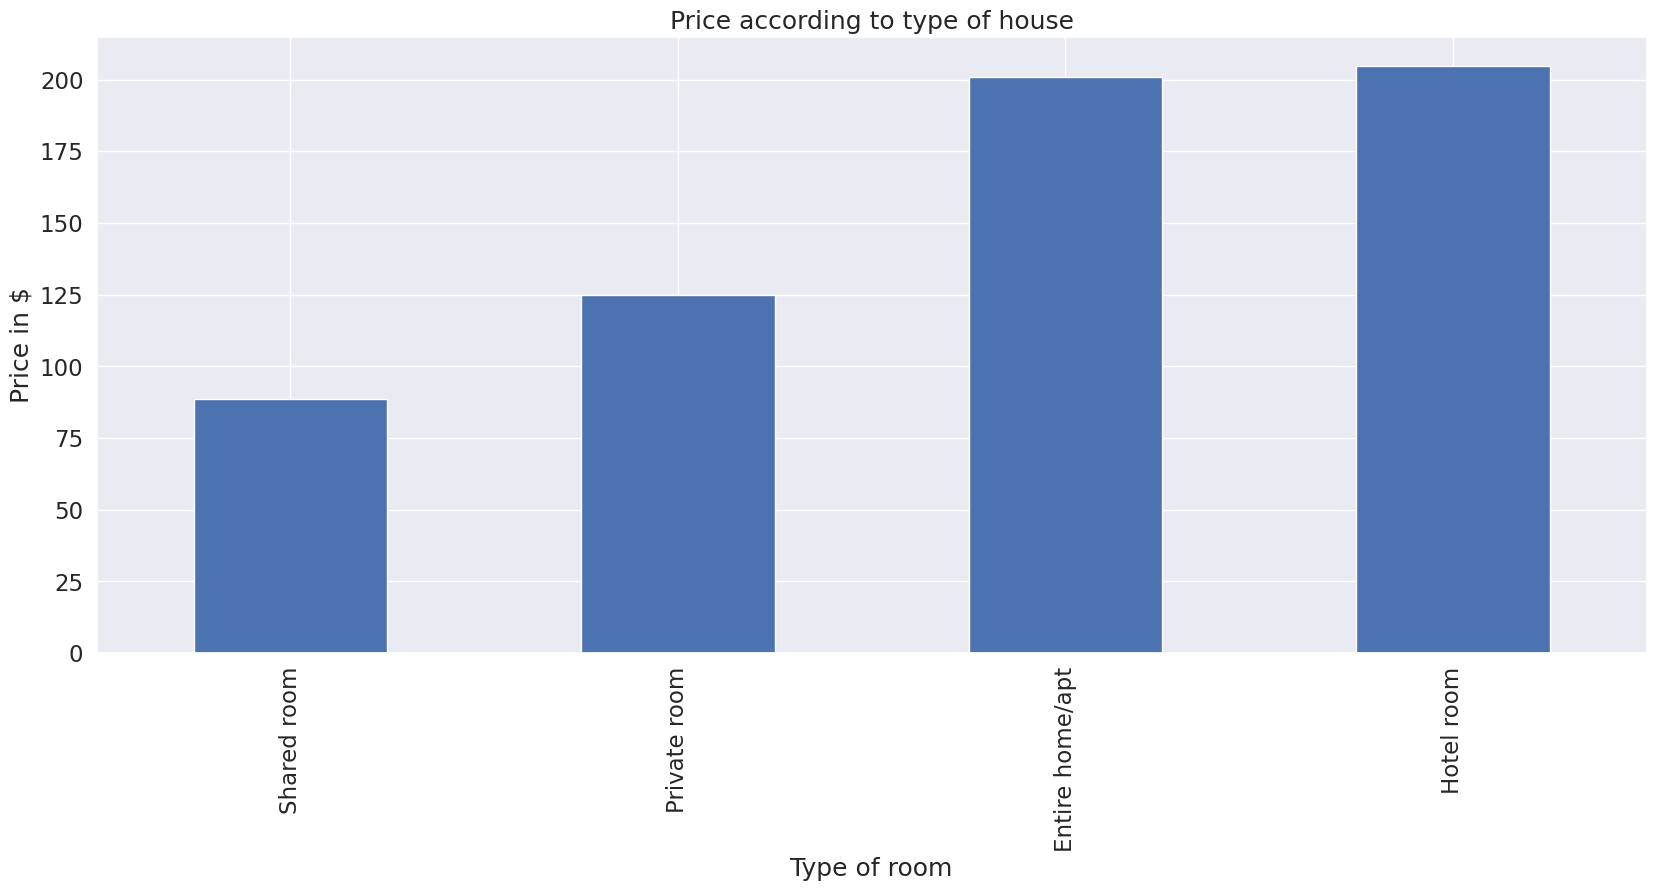

In [405]:
#average price per room type
sf_houses_price = sf_listing_data_95.groupby(['room_type']).mean()['price'].sort_values()
print(sf_houses_price)
sf_houses_price.plot(kind="bar");
plt.xlabel("Type of room")
plt.ylabel("Price in $")
plt.title("Price according to type of house");

***Result : Hotel room has highest availability and highest price. Next highest listings and prices are for Private room and Entire home/apt. Shared room has lowest availability and lowest price.***

***3. Which neighbourhood has most listings? Is price related to the number of listings in that neighbourhood?***

In [406]:
#Number of listings per neighborhood
sf_listing_data_95['neighbourhood'].value_counts()

Downtown/Civic Center    626
Mission                  484
Western Addition         339
South of Market          325
Outer Sunset             265
Bernal Heights           255
Castro/Upper Market      230
Haight Ashbury           230
Nob Hill                 228
Noe Valley               190
Outer Richmond           152
Inner Richmond           149
Marina                   145
Excelsior                144
Bayview                  140
Parkside                 124
Potrero Hill             118
Inner Sunset             116
Outer Mission            104
Pacific Heights          104
Russian Hill              99
North Beach               93
Chinatown                 92
Financial District        89
West of Twin Peaks        87
Ocean View                81
Visitacion Valley         58
Glen Park                 46
Lakeshore                 46
Twin Peaks                39
Crocker Amazon            37
Presidio Heights          24
Diamond Heights            9
Presidio                   7
Seacliff      

***Which neighbourhood has most availibility?***

In [407]:
#available days per neighborhood
sf_listings_avail = sf_listing_data_95.groupby(['neighbourhood']).mean()['availability_365'].sort_values()
sf_listings_avail

neighbourhood
Bernal Heights           129.576471
Seacliff                 135.000000
Diamond Heights          136.333333
Downtown/Civic Center    147.931310
Castro/Upper Market      152.682609
Mission                  153.710744
Haight Ashbury           153.878261
Outer Richmond           154.414474
Noe Valley               154.542105
Outer Sunset             157.943396
Potrero Hill             162.042373
Visitacion Valley        162.706897
Parkside                 163.516129
Russian Hill             164.555556
Western Addition         164.958702
Bayview                  168.242857
Presidio Heights         172.875000
Inner Richmond           173.570470
Inner Sunset             173.758621
Glen Park                179.021739
Lakeshore                179.478261
Ocean View               181.407407
Excelsior                184.798611
West of Twin Peaks       186.080460
Crocker Amazon           186.162162
Chinatown                188.663043
Twin Peaks               189.179487
Marina        

***Price variability with neighbourhood***

In [408]:
#average price per neighborhood
sf_listing_data_95.groupby(['neighbourhood']).mean()['price'].sort_values()

neighbourhood
Crocker Amazon           100.351351
Ocean View               109.283951
Excelsior                113.034722
Bayview                  128.392857
Visitacion Valley        129.465517
Lakeshore                131.521739
Outer Sunset             137.260377
Outer Mission            140.865385
Nob Hill                 153.837719
Parkside                 155.241935
Golden Gate Park         162.333333
Downtown/Civic Center    165.329073
West of Twin Peaks       166.379310
Inner Sunset             166.543103
Financial District       169.741573
South of Market          170.581538
Mission                  172.522727
Outer Richmond           178.368421
Western Addition         179.902655
Bernal Heights           187.015686
Haight Ashbury           187.573913
Pacific Heights          188.701923
Inner Richmond           189.993289
Chinatown                190.782609
Marina                   196.455172
Noe Valley               200.994737
North Beach              212.408602
Potrero Hill  

                        diff_mean
neighbourhood                    
Crocker Amazon         -73.012577
Ocean View             -64.079978
Excelsior              -60.329207
Bayview                -44.971072
Visitacion Valley      -43.898412
Lakeshore              -41.842190
Outer Sunset           -36.103551
Outer Mission          -32.498544
Nob Hill               -19.526210
Parkside               -18.121993
Golden Gate Park       -11.030596
Downtown/Civic Center   -8.034855
West of Twin Peaks      -6.984618
Inner Sunset            -6.820825
Financial District      -3.622356
South of Market         -2.782390
Mission                 -0.841202
Outer Richmond           5.004492
Western Addition         6.538726
Bernal Heights          13.651757
Haight Ashbury          14.209984
Pacific Heights         15.337994
Inner Richmond          16.629360
Chinatown               17.418680
Marina                  23.091244
Noe Valley              27.630808
North Beach             39.044673
Potrero Hill  

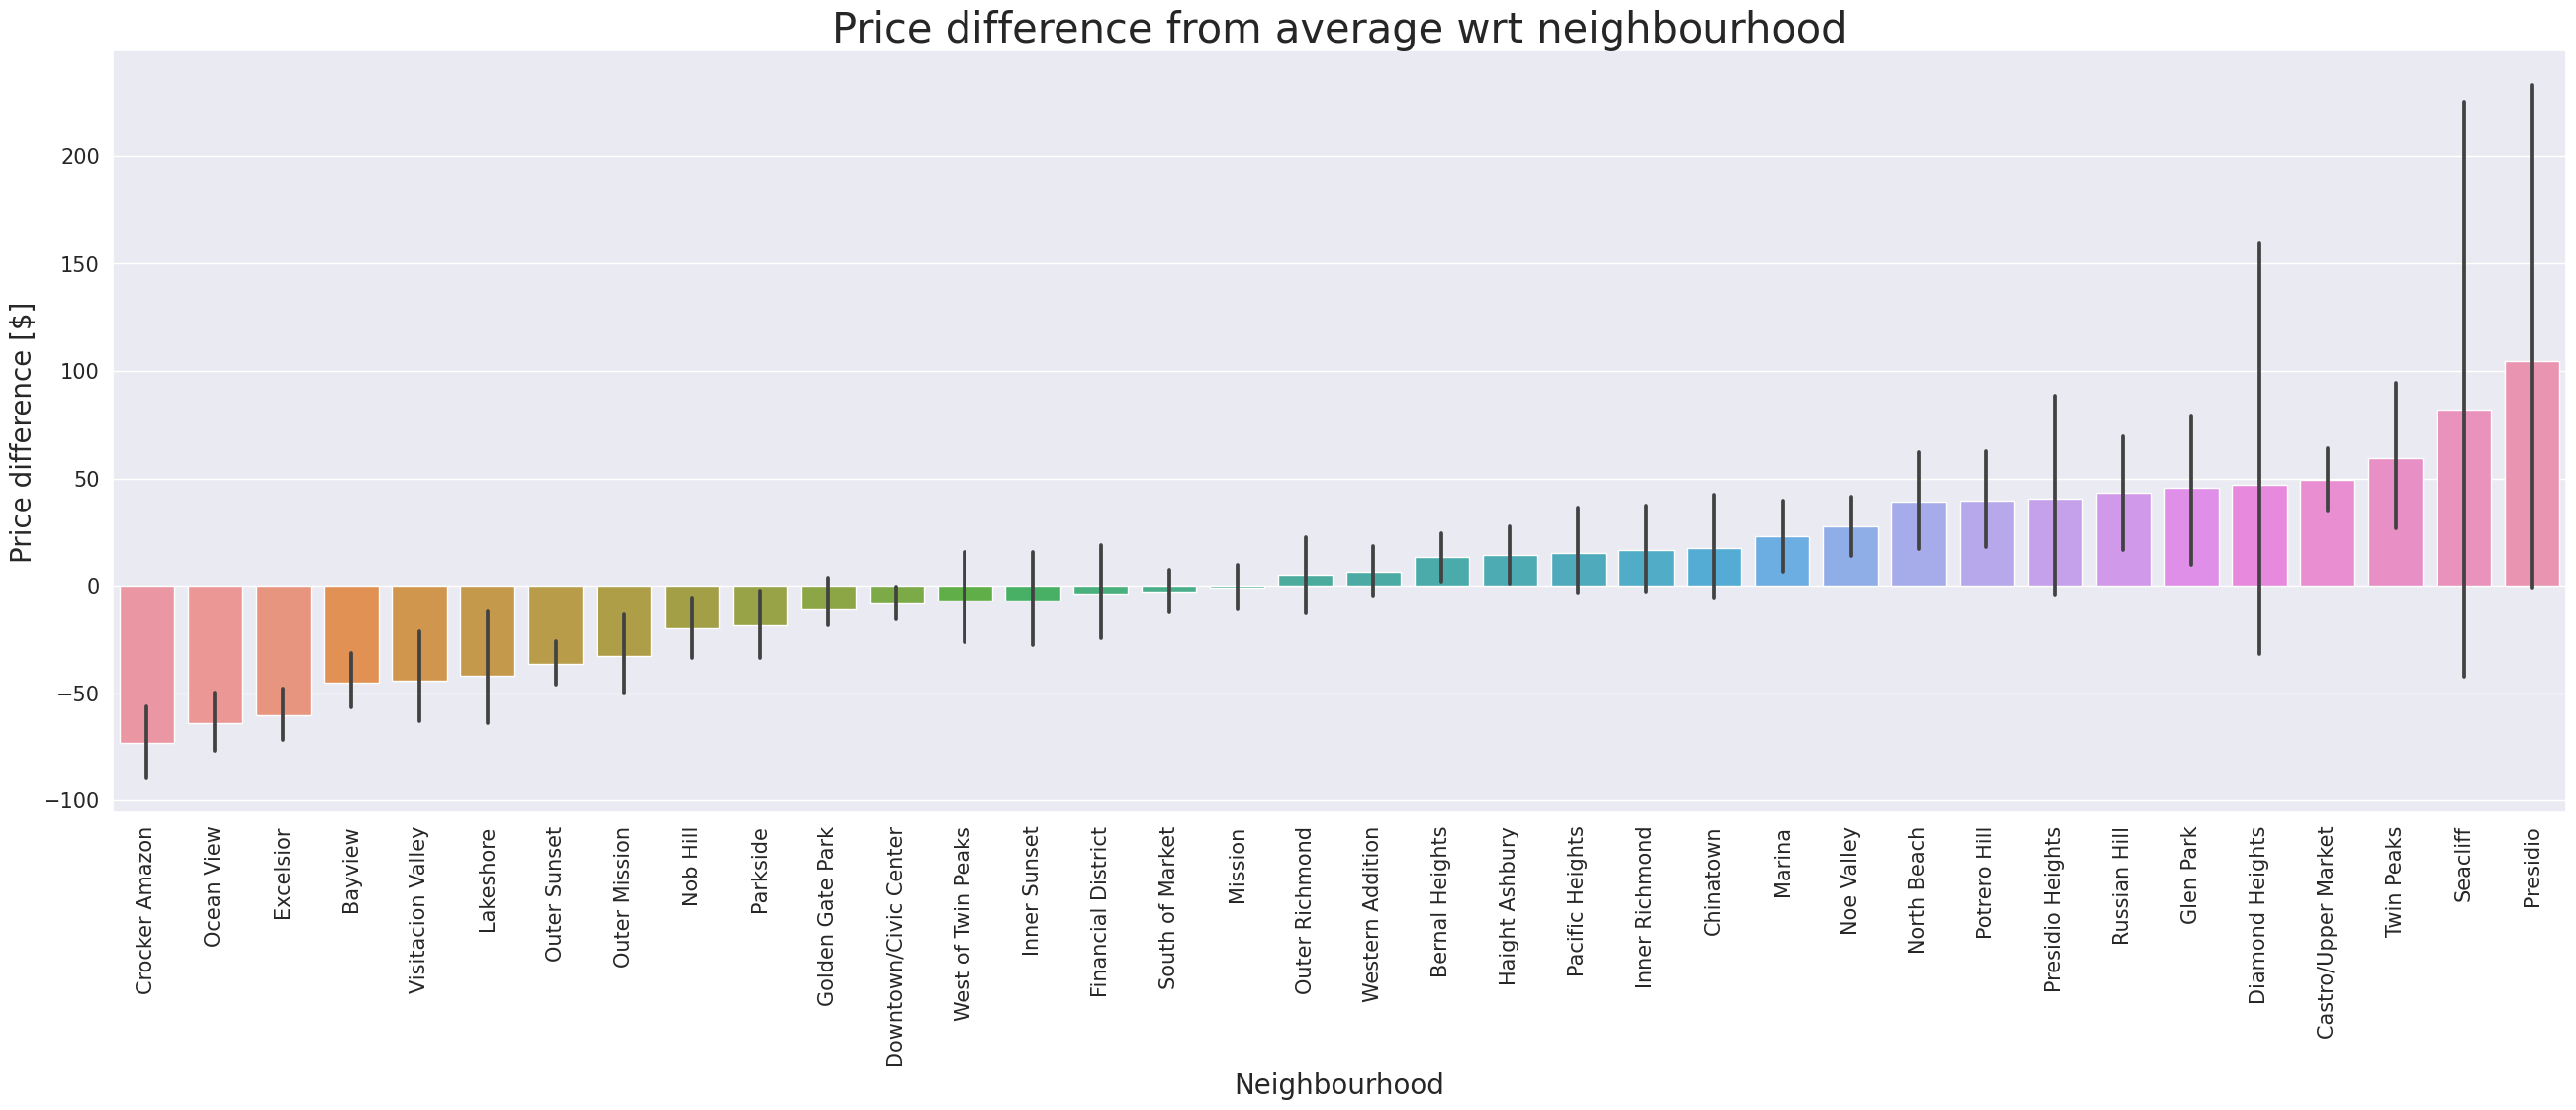

In [409]:
# difference between the price mean per month and the price mean
sf_listing_data_95['diff_mean'] = sf_listing_data_95['price'] - sf_listing_data_95['price'].mean()
sf_listings_sorted = sf_listing_data_95.groupby(['neighbourhood']).mean()['diff_mean'].sort_values()
c = sf_listings_sorted.to_frame()
print(c)
# Plot the price difference
fig2 = plt.figure(figsize=(32,10))
ax = fig2.add_subplot(1, 1, 1, aspect='auto')
sns.barplot(x = sf_listing_data_95['neighbourhood'], y = sf_listing_data_95['diff_mean'],order = c.index)
# Set axis label properties
ax.set_xlabel('Neighbourhood', weight='normal', size=20)
ax.set_ylabel('Price difference [$]', weight='normal', size=20)
plt.title('Price difference from average wrt neighbourhood', fontsize=30)
# Set tick label properties
ax.tick_params('x', labelsize=15, rotation=90)
ax.tick_params('y', labelsize=15)
plt.show()

***Result : Downtown,Mission, Western Addition and South of Market have most listings whereas Presidio, South of Market and Golden Gate Park have highest number of days available (Note: Golden Gate Park has only 3 listings availability so availability is not an accurate metric) and Presidio, Seacliff and Twin Peaks are the most expensive.***